### **Importing the Necessary Libraries**

In [1]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

### **Generating the Sample Data**

run conda update --all before working with networkx

In [2]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

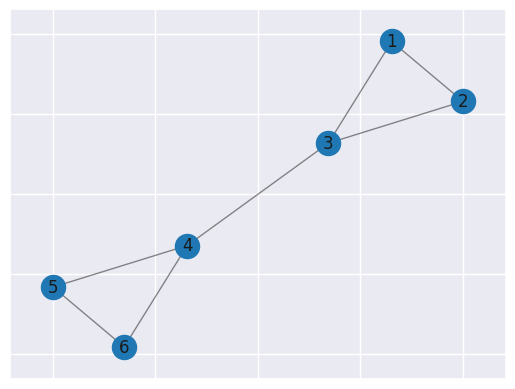

In [3]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [2, 3],
    [3, 4],
    [4, 5],
    [4, 6],
    [5, 6],
])
draw_graph(G)

In [4]:
#printing the adjacency matrix
W = nx.adjacency_matrix(G)
print(W.todense())

[[0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [1 1 0 1 0 0]
 [0 0 1 0 1 1]
 [0 0 0 1 0 1]
 [0 0 0 1 1 0]]


In [5]:
#printing the degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)

degree matrix:
[[2 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]


In [6]:
#printing the laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

laplacian matrix:
[[ 2 -1 -1  0  0  0]
 [-1  2 -1  0  0  0]
 [-1 -1  3 -1  0  0]
 [ 0  0 -1  3 -1 -1]
 [ 0  0  0 -1  2 -1]
 [ 0  0  0 -1 -1  2]]


In the Laplacian matrix (L), we have a special property to classify our data.
- If the graph (W) has K connected components, then L has K eigenvectors with an eigenvalue of 0.

Therefore, since in our current example we only have one component, so here one eigenvalue will be equal to 0.

In [7]:
#we set numpy to use this lambda function for formatting every float it prints out to upto 3 decimal places
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [8]:
e, v = np.linalg.eig(L)
#printing eigenvalues
print('eigenvalues:')
print(e)
#printing eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[4.562 -0.000 0.438 3.000 3.000 3.000]
eigenvectors:
[[0.185 -0.408 0.465 0.378 -0.756 0.040]
 [0.185 -0.408 0.465 -0.734 0.463 0.238]
 [-0.657 -0.408 0.261 0.357 0.292 -0.278]
 [0.657 -0.408 -0.261 0.357 0.292 -0.278]
 [-0.185 -0.408 -0.465 -0.189 -0.148 -0.472]
 [-0.185 -0.408 -0.465 -0.168 -0.145 0.751]]


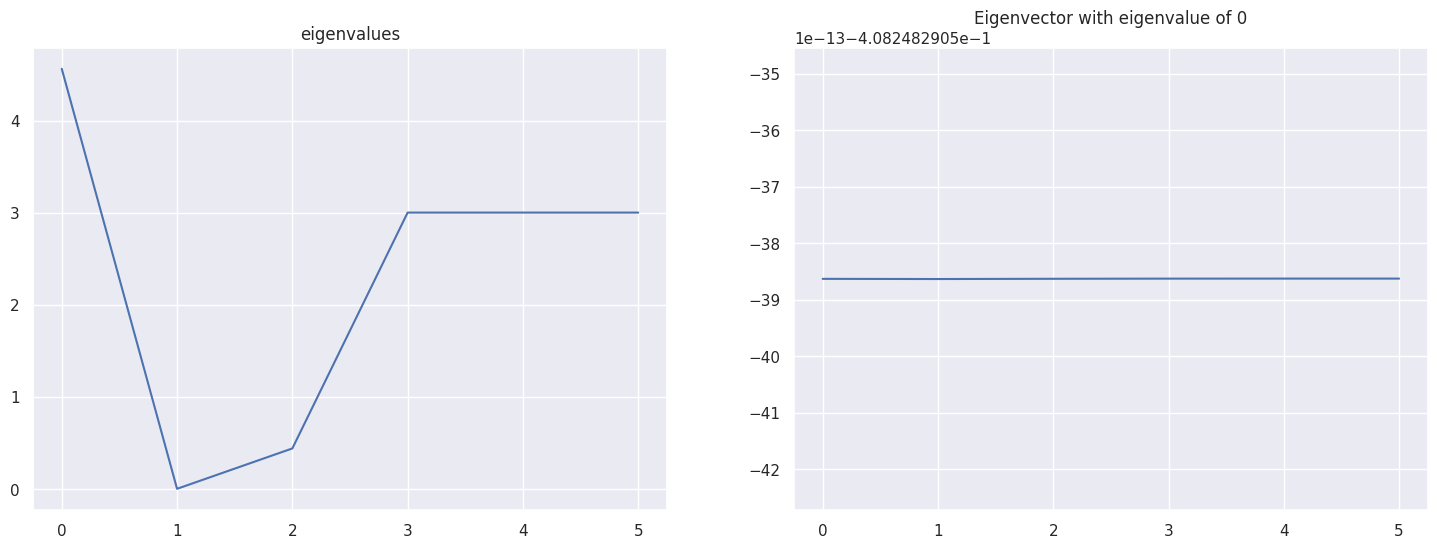

In [9]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')

i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
ax2.title.set_text('Eigenvector with eigenvalue of 0')

Now, we use K-Means to classify the nodes based off of their corresponding values in the eigenvector.

In [11]:
U = np.array(v[:, i[0]]).reshape(-1, 1) # Reshape to make it 2D
kmeans = KMeans(init='k-means++', n_clusters=2)
kmeans.fit(U)
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 1, 1, 1], dtype=int32)

### **Comparing K-means to Spectral Clustering For Non-Convex Clusters (Concentric Circles)**

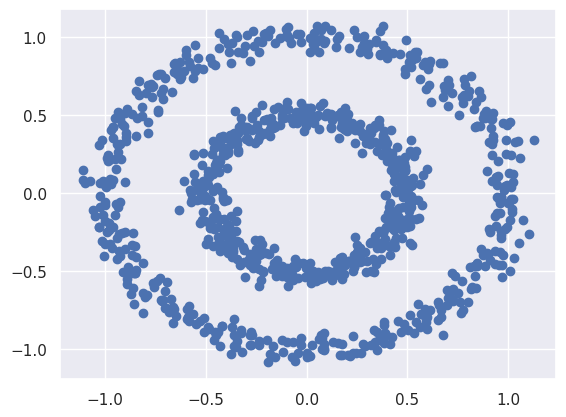

In [13]:
X, clusters = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0)
plt.scatter(X[:,0], X[:,1])

#### **Using K-Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


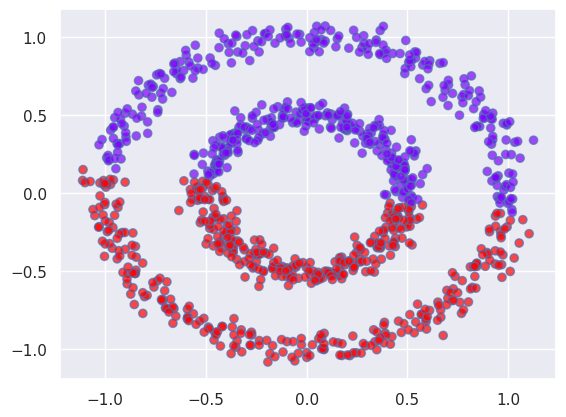

In [14]:
kmeans = KMeans(init='k-means++', n_clusters=2)
kmeans_clustering = kmeans.fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')

#### **Using Spectral Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


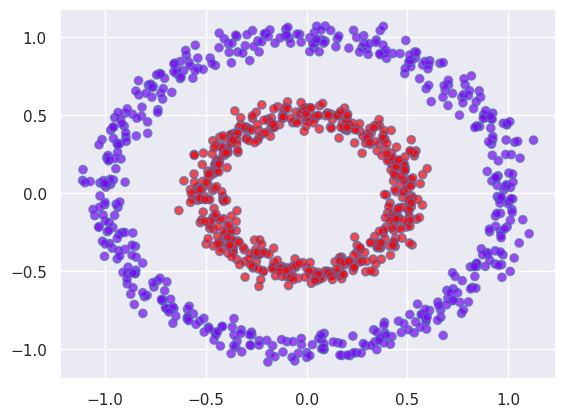

In [15]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
spectral_clustering = sc.fit(X)
plt.scatter(X[:,0], X[:,1], c=spectral_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')